In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import itertools
from sklearn.preprocessing import StandardScaler
import backtrader as bt
import pyfolio as pf
from utils import read_data, BaseStrategy
%matplotlib inline

# Rob Hanna strategy

In [2]:
class TestStrategy(BaseStrategy):
    def __init__(self):
        self.min20 = bt.indicators.Lowest(self.data0, period=20)
        self.sma200 = bt.indicators.SimpleMovingAverage(self.data0, period=200)
        
        self.first_cond = self.min20 == self.data0.close
        self.second_cond = (self.sma200 < self.data0.close)
        
    def next(self):
        if self.position and len(self) >= (self.buy_executed + 5):
            self.sell(exectype=bt.Order.Close)
            self.buy_executed = None
        
        is_monday = self.data.datetime.datetime(0).weekday() == 0
#         self.log('{} {}'.format(self.min20[0], self.sma200[0]))
        if self.first_cond and self.second_cond and is_monday:
            self.buy(exectype=bt.Order.Market)
            self.buy_executed = len(self)
            self.log_candles()

In [3]:
cerebro = bt.Cerebro()
cerebro.addstrategy(TestStrategy)

data = bt.feeds.PandasData(dataname=read_data('SPY_1993-2018.xls'), fromdate=datetime(2004,1,1))

cerebro.adddata(data)
cerebro.broker.setcash(100000.0)
cerebro.broker.setcommission(commission=0.001)
cerebro.broker.set_coc(True)
cerebro.addsizer(bt.sizers.PercentSizer, percents=50)

cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
results = cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

strat = results[0]
pyfoliozer = strat.analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()

Starting Portfolio Value: 100000.00
2005-01-24, ===>
2005-01-24, Current Open: 117.09, Close: 116.55
2005-01-24, Next Open: 116.91, Close: 116.88
2005-01-25, BUY EXECUTED, 116.55
2005-02-01, SELL EXECUTED, 118.91
2005-03-21, ===>
2005-03-21, Current Open: 118.71, Close: 118.1
2005-03-21, Next Open: 118.37, Close: 116.9
2005-03-22, BUY EXECUTED, 118.10
2005-03-30, SELL EXECUTED, 118.18
2006-05-22, ===>
2006-05-22, Current Open: 126.28, Close: 126.13
2006-05-22, Next Open: 127.18, Close: 125.17
2006-05-23, BUY EXECUTED, 126.13
2006-05-31, SELL EXECUTED, 127.51
2007-03-05, ===>
2007-03-05, Current Open: 137.93, Close: 137.35
2007-03-05, Next Open: 138.78, Close: 139.7
2007-03-06, BUY EXECUTED, 137.35
2007-03-13, SELL EXECUTED, 138.25
2010-02-08, ===>
2010-02-08, Current Open: 106.74, Close: 105.89
2010-02-08, Next Open: 107.13, Close: 107.22
2010-02-09, BUY EXECUTED, 105.89
2010-02-17, SELL EXECUTED, 110.26
2011-05-23, ===>
2011-05-23, Current Open: 131.98, Close: 132.06
2011-05-23, Next 

Entire data start date: 2004-01-02
Entire data end date: 2018-01-09
Backtest months: 168


C:\DEV\Anaconda3\envs\trading\lib\site-packages\empyrical\stats.py:954: RuntimeWarning: invalid value encountered in double_scalars
  np.abs(np.percentile(returns, 5))


,Backtest
Annual return,0.3%
Cumulative returns,4.6%
Annual volatility,1.8%
Sharpe ratio,0.18
Calmar ratio,0.04
Stability,0.23
Max drawdown,-7.6%
Omega ratio,1.20
Sortino ratio,0.24
Skew,-6.76


C:\DEV\Anaconda3\envs\trading\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,7.57,2011-05-31,2011-08-08,2015-06-11,1053
1,1.03,2007-03-12,2007-03-13,2010-02-16,767
2,0.90,2006-05-26,2006-05-30,2007-03-06,203
3,0.89,2015-07-07,2015-07-08,NaT,NaN
4,0.71,2005-03-21,2005-03-29,2006-05-25,309


C:\DEV\Anaconda3\envs\trading\lib\site-packages\pyfolio\plotting.py:819: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  bmark_vol = factor_returns.loc[returns.index].std()
C:\DEV\Anaconda3\envs\trading\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


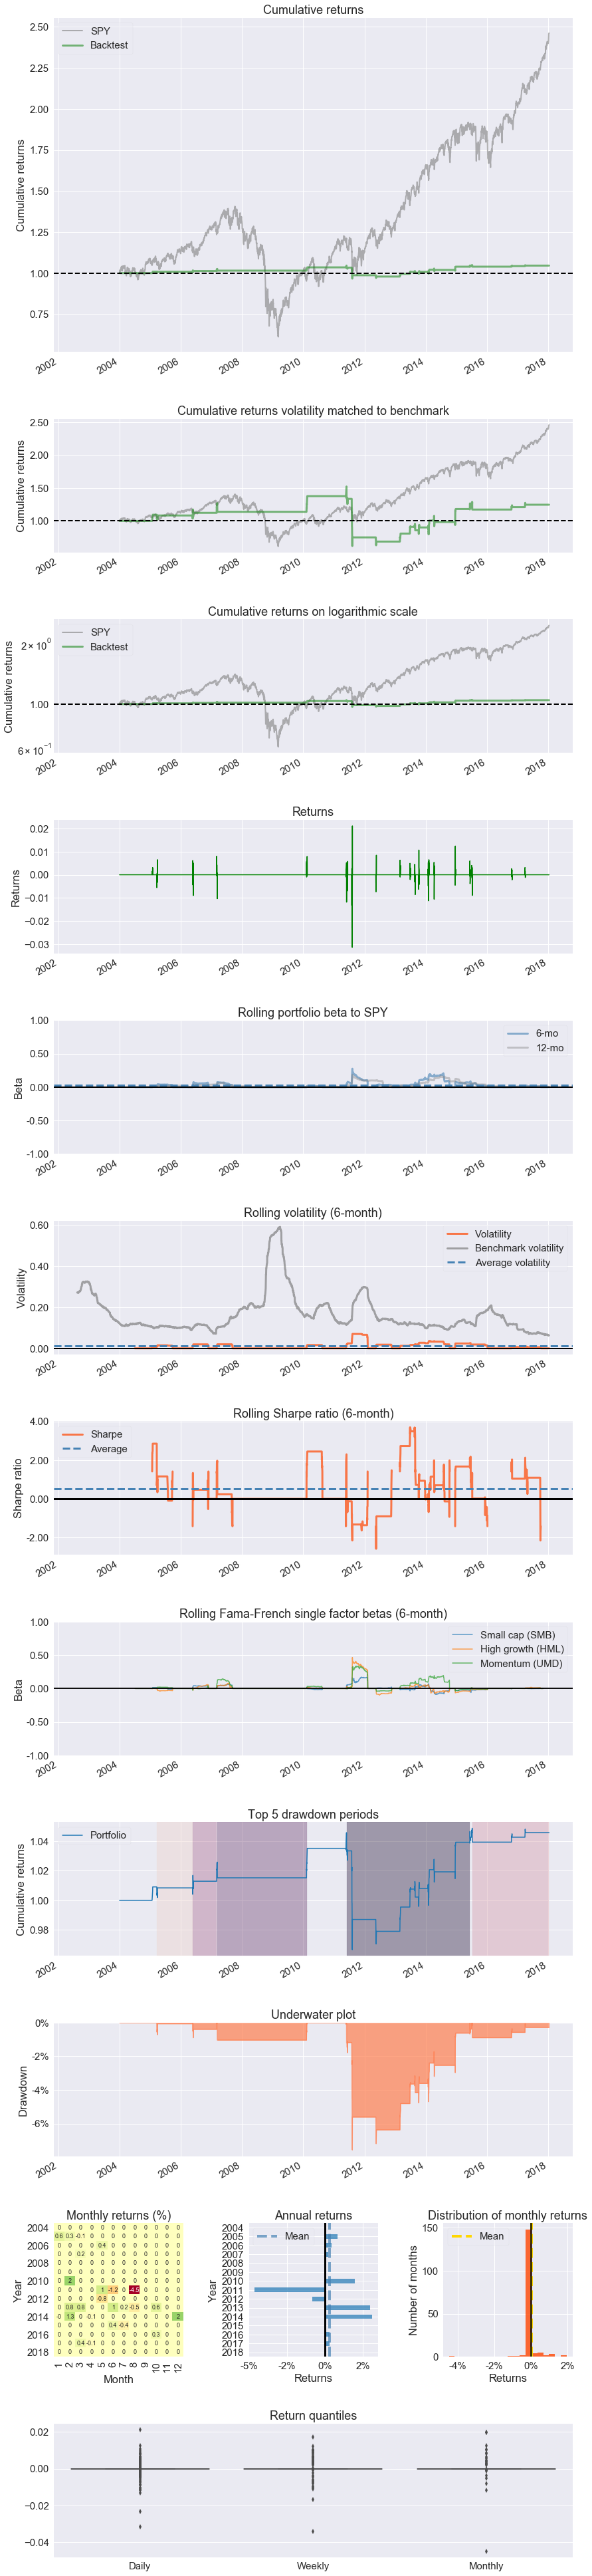

Stress Events,mean,min,max
Lehmann,0.00%,0.00%,0.00%
US downgrade/European Debt Crisis,-0.05%,-3.14%,2.12%
Fukushima,0.00%,0.00%,0.00%
EZB IR Event,0.00%,0.00%,0.00%
Aug07,0.00%,0.00%,0.00%
Mar08,0.00%,0.00%,0.00%
Sept08,0.00%,0.00%,0.00%
2009Q1,0.00%,0.00%,0.00%
2009Q2,0.00%,0.00%,0.00%
Flash Crash,0.00%,0.00%,0.00%


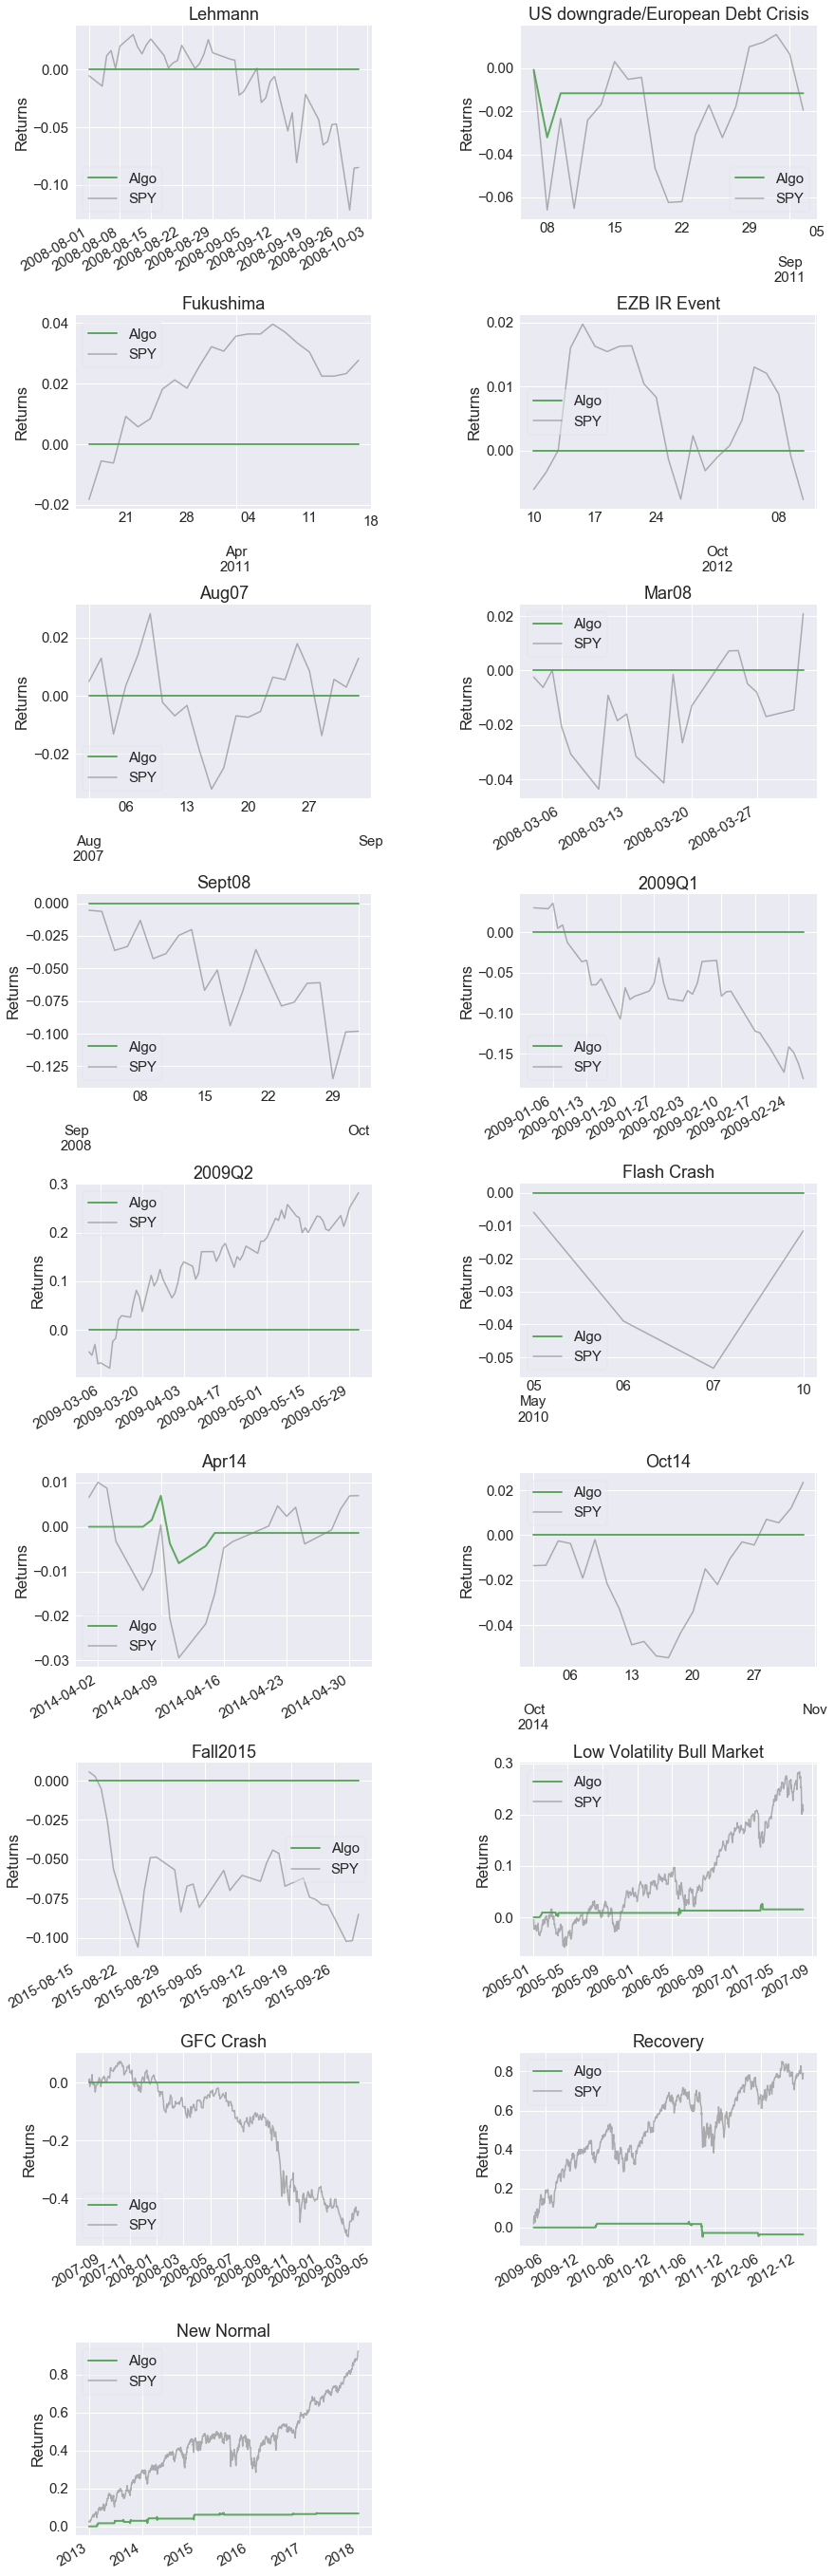

Top 10 long positions of all time,max
Data0,51.00%


Top 10 short positions of all time,max


Top 10 positions of all time,max
Data0,51.00%


All positions ever held,max
Data0,51.00%


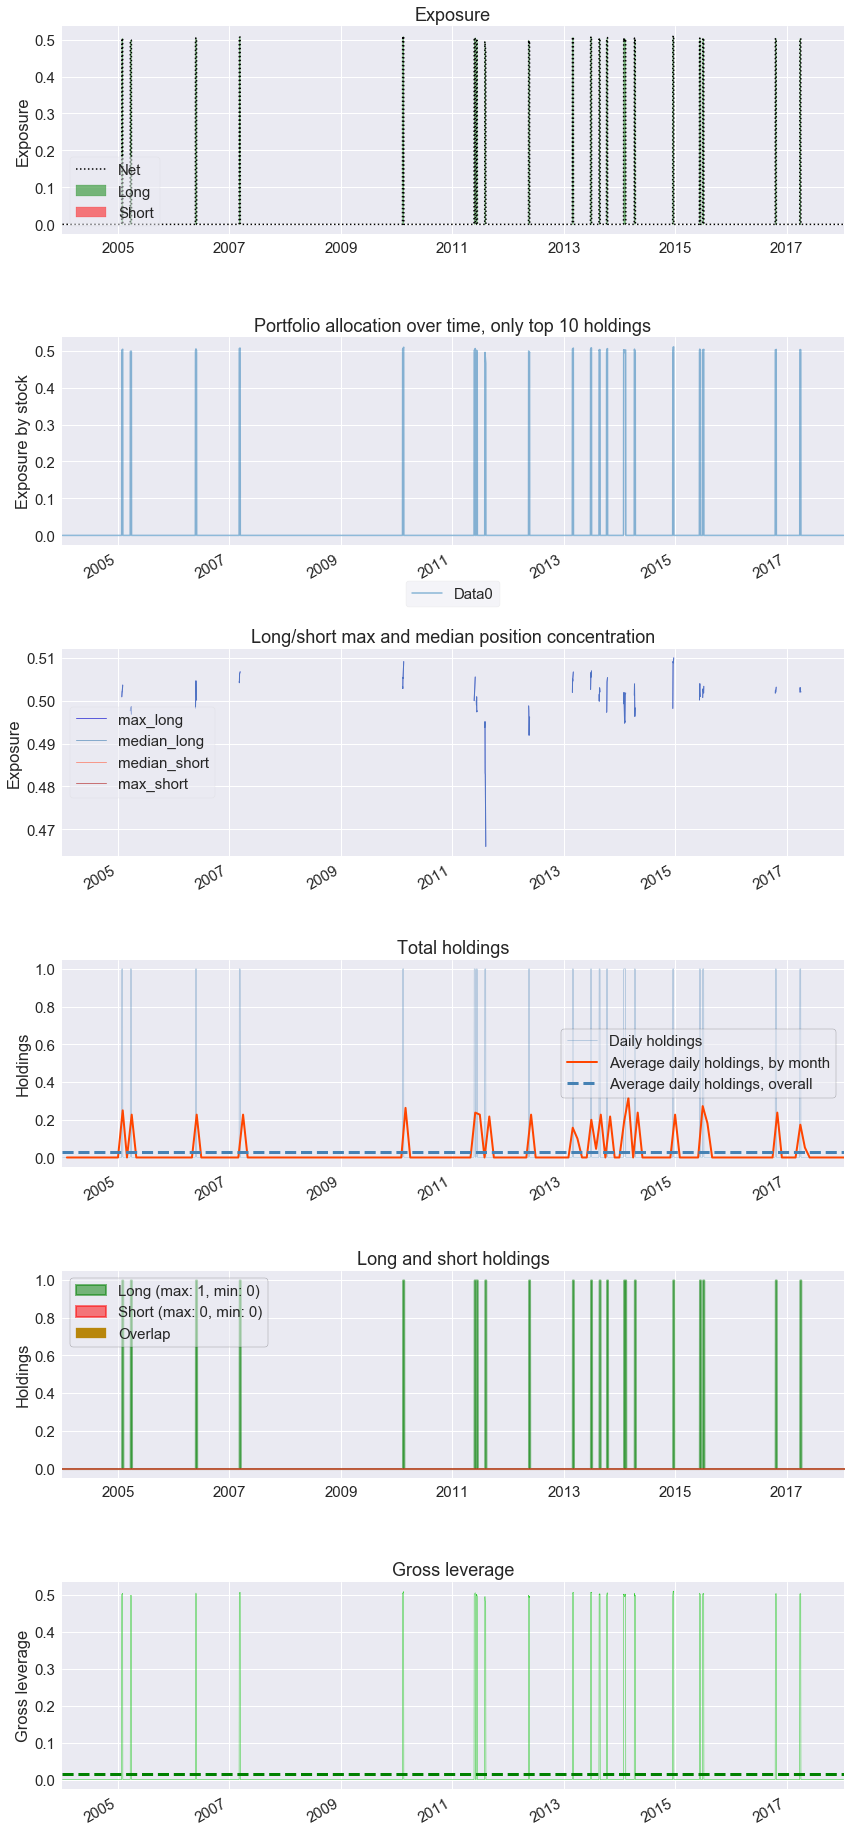

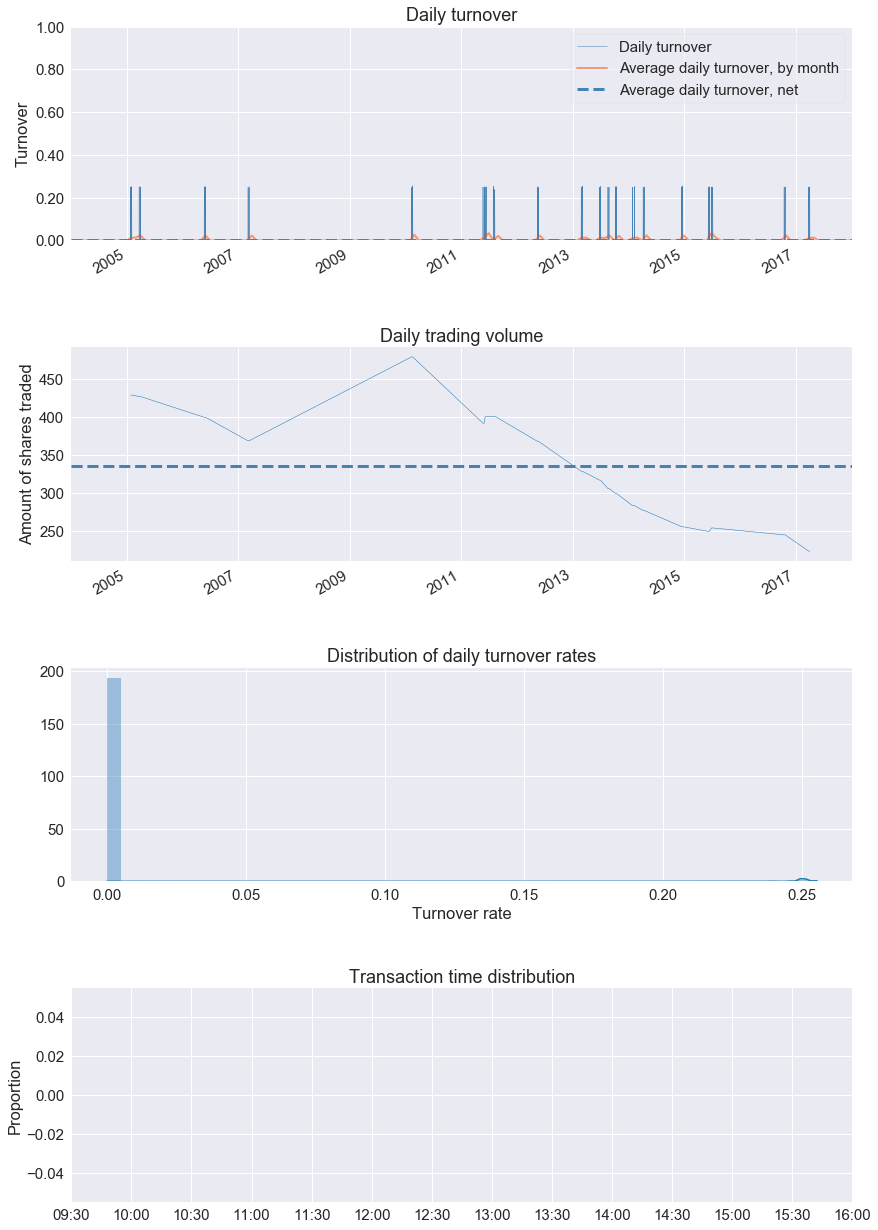

In [5]:
pf.create_full_tear_sheet(returns=returns, 
                          positions=positions, 
                          transactions=transactions)